In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
from scipy import stats
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '/Users/lucyowen/repos/supereeg_paper/paper_figs/supplemental_1'

In [3]:
fig_count = 0

# PyFR analysis

In [4]:
pyfr_across = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_across.csv', index_col=0)
pyfr_within = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_within.csv', index_col=0)

## Merge dataframes

In [5]:
pyFR_df = pd.merge(pyfr_across, pyfr_within, on=['Subject', 'R'])
pyFR_df.dropna(inplace=True)
pyFR_df.rename(columns={"Correlation_x":"Correlation_Across", "Correlation_y":"Correlation_Within"}, inplace=True)
e_corrs = pd.DataFrame()
e_corrs['across'] = plot.r2z(pyFR_df['Correlation_Across'])
e_corrs['within'] = plot.r2z(pyFR_df['Correlation_Within'])
e_corrs['Subject'] = pyFR_df['Subject']
e_corrs['R'] = pyFR_df['R']

## Across vs within subject analysis

In [6]:
pyfr_locs = plot.compile_df_locs(pyfr_across['R'])
corr_pyfr_locs = np.atleast_2d(pyfr_across['Correlation'])

In [7]:
long_form_across = pd.DataFrame()
long_form_across['Correlation'] = pyFR_df['Correlation_Across']
long_form_across['Subject'] = 'a'
long_form_across['Experiment'] = 'w'
long_form_within = pd.DataFrame()
long_form_within['Correlation'] = pyFR_df['Correlation_Within']
long_form_within['Subject'] = 'w'
long_form_within['Experiment'] = 'w'

In [8]:
long_form_pyfr = long_form_across.append(long_form_within)

6
7


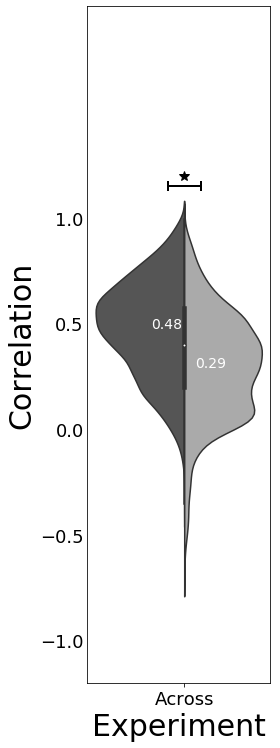

In [9]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
fig = plt.gcf()
fig.set_size_inches(4, 10.5)
plt.ylim(-1.2,2.0)
ax = sns.violinplot(x="Experiment", y="Correlation", hue="Subject", ylim=[-1,1], data=long_form_pyfr, palette="gray", split=True)
ax.legend().set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', which='both', length=0, labelsize=18)

yposlist = long_form_pyfr.groupby(['Experiment', 'Subject'])['Correlation'].mean().tolist()
#yposlist = yposlist_df.reindex(["w", "a", "all"], level='Experiment').tolist()
xposlist = range(1)

c = 0
for i in range(len(yposlist)):

    if (i%2) == 0:
        ax.text(c-.15, yposlist[i], np.round(yposlist[i],2), fontsize=14, color='white')
    else:
        ax.text(c+.05, yposlist[i], np.round(yposlist[i],2) , fontsize=14, color='white')
        c +=1

### first two significance lines:
ylim = 1.2
for l in range(1):
    plt.plot([l-.075, l+.075], [1.15, 1.15], marker = '|', mew=2, markersize=10, color='k', linewidth=2)
    ax.plot(l, 1.15 + .05, marker = '*', markersize=10, color='k')
    
ax.set_xticklabels(['Across', 'All', 'Within'])
ax.set_ylabel('Correlation', fontsize=30)
ax.set_xlabel('Experiment', fontsize=30)
for index, label in enumerate(ax.yaxis.get_ticklabels()):
    if index > 5:
        print(index)
        label.set_visible(False)

plt.tight_layout()
plt.savefig(outfile)

# RAM

In [10]:
W_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-a_exp.csv', index_col=0)
W_a_a.name = 'W_a_a'
W_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-all_exp.csv', index_col=0)
W_a_all.name = 'W_a_all'
W_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-w_exp.csv', index_col=0)
W_a_w.name = 'W_a_w'
W_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-a_exp.csv', index_col=0)
W_w_a.name = 'W_w_a'
W_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-all_exp.csv', index_col=0)
W_w_all.name = 'W_w_all'
W_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-w_exp.csv', index_col=0)
W_w_w.name = 'W_w_w'

In [11]:
dfs = [W_a_a, W_a_all, W_a_w, W_w_a, W_w_all, W_w_w]

In [12]:
RAM_df = dfs[0]
RAM_df = RAM_df.rename(columns={"Correlation":RAM_df.name})
for df_ in dfs[1:]:
    RAM_df = RAM_df.merge(df_, on=['Subject', 'R'])
    
    RAM_df = RAM_df.rename(columns={"Correlation":df_.name})

In [13]:
RAM_df.head()

,R,W_a_a,Subject,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w
0,[-50.39 18.22 -43.3 ],0.242494,R1083J_RAM_CatFR1_2,0.300987,0.447637,-0.162586,0.236228,0.061755
1,[-46.17 18.21 -42.23],0.177056,R1083J_RAM_CatFR1_1,0.046046,0.478972,0.165845,0.275166,0.292074
2,[-57.19 19.07 -44.75],0.234188,R1083J_RAM_CatFR1_4,0.788364,0.916196,0.542039,-0.021315,0.117429
3,[-43.21 18.21 -41.49],0.336156,R1083J_RAM_CatFR1_0,0.536711,0.796827,0.005241,-0.211179,0.046857
4,[-54.86 15.87 40.38],0.024989,R1032D_RAM_FR1_3,0.426785,0.232029,0.187670,0.312530,0.378536


In [14]:
RAM_df.dropna(inplace=True)

In [15]:
RAM_df.shape

(2975, 8)

In [16]:
column_corrs = []
for d in dfs:
    column_corrs.append(d.name)

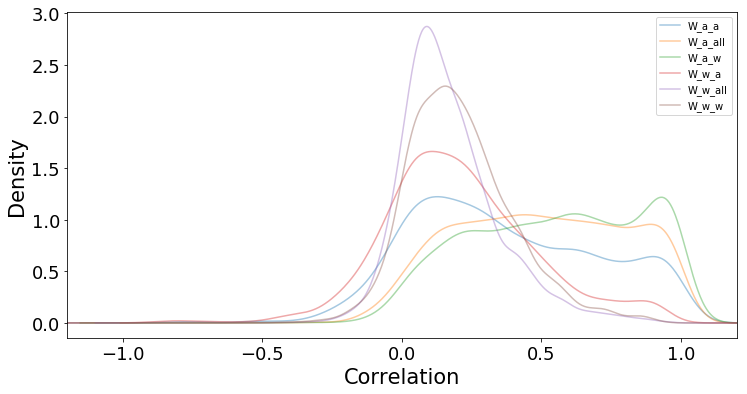

In [17]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

ax = RAM_df[column_corrs].plot(kind='kde', figsize=[12,6], alpha=.4, legend=True, xlim=(-1.2, 1.2))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Density', fontsize=21)
ax.set_xlabel('Correlation', fontsize=21)
plt.savefig(outfile)

In [18]:
RAM_df[column_corrs].mean()

W_a_a      0.367041
W_a_all    0.499905
W_a_w      0.550451
W_w_a      0.206165
W_w_all    0.172684
W_w_w      0.210246
dtype: float64

In [19]:
within_dfs = [W_w_a, W_w_all, W_w_w]

across_dfs = [W_a_a, W_a_all, W_a_w]

In [20]:
all_subject_e = np.array([])
all_W_w_w = np.array([])
all_W_a_w = np.array([])
all_W_a_all= np.array([])
all_W_a_a = np.array([])
all_W_w_all = np.array([])
all_W_w_a = np.array([])


all_R_e = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    #print(item.split('_')[0])
    all_subject_e = np.append(all_subject_e, item.split('_')[0] + '_' + item.split('_')[1]+ '_' + item.split('_')[2])
    all_W_w_w = np.append(all_W_w_w, RAM_df['W_w_w'].iloc[i])
    all_W_a_w = np.append(all_W_a_w, RAM_df['W_a_w'].iloc[i])
    all_W_a_all= np.append(all_W_a_all, RAM_df['W_a_all'].iloc[i])
    all_W_a_a = np.append(all_W_a_a, RAM_df['W_a_a'].iloc[i])
    all_W_w_all = np.append(all_W_w_all, RAM_df['W_w_all'].iloc[i])
    all_W_w_a = np.append(all_W_w_a, RAM_df['W_w_a'].iloc[i])
    all_R_e = np.append(all_R_e, RAM_df['R'].iloc[i])

corr_all_e_df = pd.DataFrame()
corr_all_e_df['Subject'] = all_subject_e
corr_all_e_df['W_w_w'] = plot.r2z(all_W_w_w)
corr_all_e_df['W_a_w'] = plot.r2z(all_W_a_w )
corr_all_e_df['W_a_all'] = plot.r2z(all_W_a_all)
corr_all_e_df['W_a_a'] = plot.r2z(all_W_a_a)
corr_all_e_df['W_w_all'] = plot.r2z(all_W_w_all )
corr_all_e_df['W_w_a'] = plot.r2z(all_W_w_a )

corr_all_e_df['R'] = all_R_e

corr_all_e_df.dropna(inplace=True)

grouped_results_within = corr_all_e_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all'].mean()

grouped_results_within




## this didnt work... need to separate subject id from electrode number
grouped_within_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_.name] = grouped_results_within[df_.name].values
        f_corrs[f_.name] = grouped_results_within[f_.name].values
        tstat = stats.ttest_rel(f_corrs[df_.name], f_corrs[f_.name])
        grouped_within_t_test = grouped_within_t_test.append({
            'Column_1' : df_.name,
            'Column_2' : f_.name, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)
        


In [21]:
grouped_within_t_test

,Column_1,Column_2,t,p
0,W_a_a,W_a_all,-4.482767,4.716975e-05
1,W_a_a,W_a_w,-5.590442,1.115420e-06
2,W_a_a,W_w_a,5.657080,8.858277e-07
3,W_a_a,W_w_all,5.585833,1.133326e-06
4,W_a_a,W_w_w,4.782324,1.749026e-05
5,W_a_all,W_a_w,-2.188762,3.361729e-02
6,W_a_all,W_w_a,12.120989,4.532250e-16
7,W_a_all,W_w_all,10.967025,1.497755e-14
8,W_a_all,W_w_w,10.007412,3.126948e-13
9,W_a_w,W_w_a,10.266812,1.359672e-13


In [22]:
all_subject_e = np.array([])
all_W_w_w = np.array([])
all_W_a_w = np.array([])
all_W_a_all= np.array([])
all_W_a_a = np.array([])
all_W_w_all = np.array([])
all_W_w_a = np.array([])


all_R_e = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    #print(item.split('_')[0])
    all_subject_e = np.append(all_subject_e, item.split('_')[0] + '_' + item.split('_')[1]+ '_' + item.split('_')[2])
    all_W_w_w = np.append(all_W_w_w, RAM_df['W_w_w'].iloc[i])
    all_W_a_w = np.append(all_W_a_w, RAM_df['W_a_w'].iloc[i])
    all_W_a_all= np.append(all_W_a_all, RAM_df['W_a_all'].iloc[i])
    all_W_a_a = np.append(all_W_a_a, RAM_df['W_a_a'].iloc[i])
    all_W_w_all = np.append(all_W_w_all, RAM_df['W_w_all'].iloc[i])
    all_W_w_a = np.append(all_W_w_a, RAM_df['W_w_a'].iloc[i])
    all_R_e = np.append(all_R_e, RAM_df['R'].iloc[i])

corr_all_e_df = pd.DataFrame()
corr_all_e_df['Subject'] = all_subject_e
corr_all_e_df['W_w_w'] = plot.r2z(all_W_w_w)
corr_all_e_df['W_a_w'] = plot.r2z(all_W_a_w )
corr_all_e_df['W_a_all'] = plot.r2z(all_W_a_all)
corr_all_e_df['W_a_a'] = plot.r2z(all_W_a_a)
corr_all_e_df['W_w_all'] = plot.r2z(all_W_w_all )
corr_all_e_df['W_w_a'] = plot.r2z(all_W_w_a )

corr_all_e_df['R'] = all_R_e

corr_all_e_df.dropna(inplace=True)

grouped_results_within = corr_all_e_df.groupby('Subject')['W_w_all', 'W_w_a', 'W_w_w', ].mean()

grouped_results_within

grouped_results_across = corr_all_e_df.groupby('Subject')['W_a_all','W_a_a', 'W_a_w'].mean()

grouped_results_across


## this didnt work... need to separate subject id from electrode number
grouped_within_t_test_within = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in within_dfs[0:]:
    i += 1
    for f_ in within_dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_.name] = grouped_results_within[df_.name].values
        f_corrs[f_.name] = grouped_results_within[f_.name].values
        tstat = stats.ttest_rel(f_corrs[df_.name], f_corrs[f_.name])
        grouped_within_t_test_within = grouped_within_t_test_within.append({
            'Column_1' : df_.name,
            'Column_2' : f_.name, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)
        
grouped_within_t_test_across = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in across_dfs[0:]:
    i += 1
    for f_ in across_dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_.name] = grouped_results_across[df_.name].values
        f_corrs[f_.name] = grouped_results_across[f_.name].values
        tstat = stats.ttest_rel(f_corrs[df_.name], f_corrs[f_.name])
        grouped_within_t_test_across  = grouped_within_t_test_across .append({
            'Column_1' : df_.name,
            'Column_2' : f_.name, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)

In [23]:
grouped_within_t_test_across

,Column_1,Column_2,t,p
0,W_a_a,W_a_all,-4.482767,0.000047
1,W_a_a,W_a_w,-5.590442,0.000001
2,W_a_all,W_a_w,-2.188762,0.033617


In [24]:
grouped_within_t_test_within

,Column_1,Column_2,t,p
0,W_w_a,W_w_all,1.254387,0.215904
1,W_w_a,W_w_w,-0.241154,0.810485
2,W_w_all,W_w_w,-2.196497,0.033024


In [25]:
def long_form_df(full_df, df_col):

    long_form = pd.DataFrame()
    long_form['Correlation'] = full_df[df_col.name]
    long_form['Subject'] = df_col.name.split('_')[1]
    long_form['Experiment'] = df_col.name.split('_')[2]
    
    return long_form

long_form = long_form_df(RAM_df, dfs[0])
for df_ in dfs[1:]:
    long_form = long_form.append(long_form_df(RAM_df, df_))


In [26]:
long_form.head()

,Correlation,Subject,Experiment
0,0.242494,a,a
1,0.177056,a,a
2,0.234188,a,a
3,0.336156,a,a
4,0.024989,a,a


## plot all patients that participated in both experiments

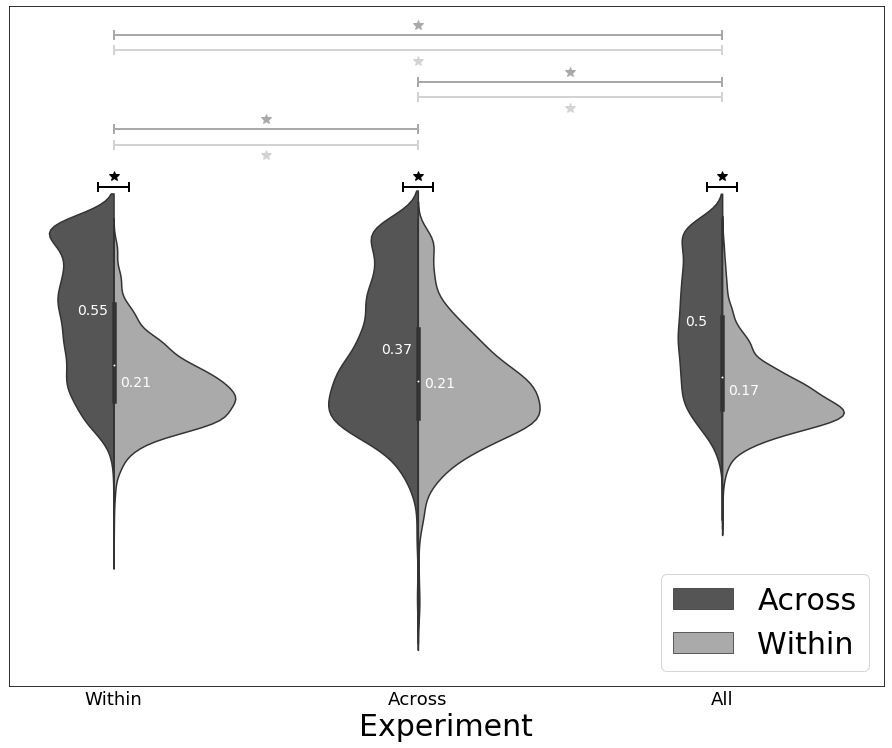

In [27]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_form, yticks=False, outfile=outfile)

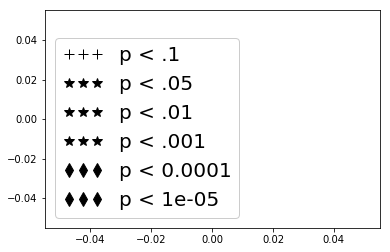

In [57]:
import numpy as np
import matplotlib.pyplot as plt

labels = ["p < .1", "p < .05", "p < .01", "p < .001", "p < " + str(10**-4), "p < " + str(10**-5), "p < " + str(10**-6)]
markers = ['+', '*', '*', '*', 'd', 'd', 'd']

f = lambda m,c: plt.plot([],[],marker=m, color=c, markersize=10, ls="none")[0]
handles = [f(markers[i], 'k') for i in range(6)]


labels =labels
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=True, numpoints=3, fontsize=20)

def export_legend(legend, filename=os.path.join(fig_dir,'legend.pdf'), expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)


## FR

In [29]:
str_find = '_FR1_'
str_find
FR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [30]:
fr_locs = plot.compile_df_locs(FR_df['R'])

In [31]:
fr_subject = np.array([])
fr_within = np.array([])
fr_across = np.array([])
fr_R = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    #print(item.split('_')[0])
    fr_subject = np.append(fr_subject, item.split('_')[0])
    fr_within = np.append(fr_within, FR_df['W_w_w'].iloc[i])
    fr_across = np.append(fr_across, FR_df['W_a_w'].iloc[i])
    fr_R = np.append(fr_R, FR_df['R'].iloc[i])

In [32]:
corr_fr_df = pd.DataFrame()
corr_fr_df['Subject'] = fr_subject
corr_fr_df['W_w_w'] = plot.r2z(fr_within)
corr_fr_df['W_a_w'] = plot.r2z(fr_across)
corr_fr_df['R'] = fr_R

In [33]:
fr_locs = plot.compile_df_locs(corr_fr_df['R'])

In [34]:
long_formFR = long_form_df(FR_df, dfs[0])
for df_ in dfs[1:]:
    long_formFR = long_formFR.append(long_form_df(FR_df, df_))


6
7


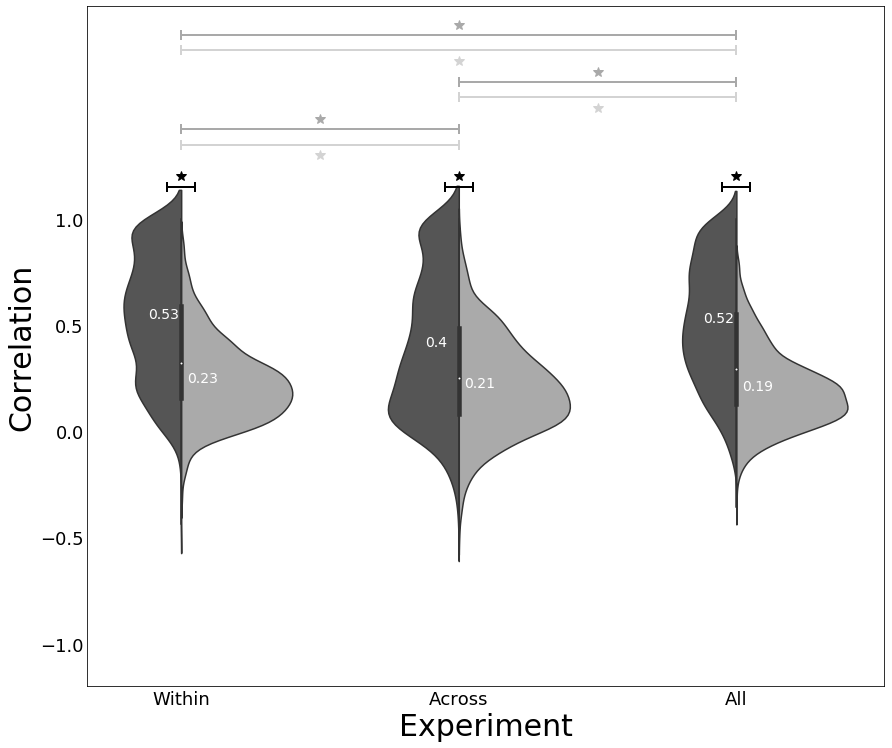

In [35]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formFR, legend=False, outfile=outfile)

In [36]:
fr_subject_e = np.array([])
fr_W_w_w = np.array([])
fr_W_a_w = np.array([])
fr_W_a_all= np.array([])
fr_W_a_a = np.array([])
fr_W_w_all = np.array([])
fr_W_w_a = np.array([])


fr_R_e = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    #print(item.split('_')[0])
    fr_subject_e = np.append(fr_subject_e, item.split('_')[0] + '_' + item.split('_')[1]+ '_' + item.split('_')[2])
    fr_W_w_w = np.append(fr_W_w_w, FR_df['W_w_w'].iloc[i])
    fr_W_a_w = np.append(fr_W_a_w, FR_df['W_a_w'].iloc[i])
    fr_W_a_all= np.append(fr_W_a_all, FR_df['W_a_all'].iloc[i])
    fr_W_a_a = np.append(fr_W_a_a, FR_df['W_a_a'].iloc[i])
    fr_W_w_all = np.append(fr_W_w_all, FR_df['W_w_all'].iloc[i])
    fr_W_w_a = np.append(fr_W_w_a, FR_df['W_w_a'].iloc[i])
    fr_R_e = np.append(fr_R_e, FR_df['R'].iloc[i])

corr_fr_e_df = pd.DataFrame()
corr_fr_e_df['Subject'] = fr_subject_e
corr_fr_e_df['W_w_w'] = plot.r2z(fr_W_w_w)
corr_fr_e_df['W_a_w'] = plot.r2z(fr_W_a_w )
corr_fr_e_df['W_a_all'] = plot.r2z(fr_W_a_all)
corr_fr_e_df['W_a_a'] = plot.r2z(fr_W_a_a)
corr_fr_e_df['W_w_all'] = plot.r2z(fr_W_w_all)
corr_fr_e_df['W_w_a'] = plot.r2z(fr_W_w_a )

corr_fr_e_df['R'] = fr_R_e

corr_fr_e_df.dropna(inplace=True)

grouped_results_fr = corr_fr_e_df.groupby('Subject')['W_a_a','W_a_all', 'W_a_w', 'W_w_w', 'W_w_all', 'W_w_a'].mean()

grouped_results_fr

## this didnt work... need to separate subject id from electrode number
grouped_fr_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_.name] = grouped_results_fr[df_.name].values
        f_corrs[f_.name] = grouped_results_fr[f_.name].values
        tstat = stats.ttest_rel(f_corrs[df_.name], f_corrs[f_.name])
        grouped_fr_t_test = grouped_fr_t_test.append({
            'Column_1' : df_.name,
            'Column_2' : f_.name, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)

In [37]:
grouped_results_fr

,W_a_a,W_a_all,W_a_w,W_w_w,W_w_all,W_w_a
Subject,,,,,,
R1032D_RAM_FR1,0.247094,0.694877,0.650405,0.203220,0.188120,0.208441
R1061T_RAM_FR1,0.580976,0.411948,0.269297,0.050210,0.104204,0.085265
R1075J_RAM_FR1,0.090166,0.329801,0.709230,0.295617,0.092890,0.038305
R1083J_RAM_FR1,0.462300,0.660974,0.261489,0.140451,0.150425,0.170120
R1092J_RAM_FR1,0.502769,1.056973,1.712125,0.454434,0.102588,0.215316
R1094T_RAM_FR1,0.457915,0.591179,0.693354,0.211856,0.122400,0.247300
R1106M_RAM_FR1,0.151608,0.604261,0.584686,0.143742,0.137655,0.034255
R1108J_RAM_FR1,0.708218,0.606812,0.663139,0.155588,0.309896,0.381194
R1111M_RAM_FR1,0.030032,0.333144,0.373051,0.131366,0.071628,0.038461


In [38]:
grouped_fr_t_test

,Column_1,Column_2,t,p
0,W_a_a,W_a_all,-3.084914,5.231164e-03
1,W_a_a,W_a_w,-2.615785,1.545343e-02
2,W_a_a,W_w_a,3.751524,1.040511e-03
3,W_a_a,W_w_all,3.623562,1.425309e-03
4,W_a_a,W_w_w,3.078242,5.314378e-03
5,W_a_all,W_a_w,-0.386683,7.025452e-01
6,W_a_all,W_w_a,9.458012,2.164402e-09
7,W_a_all,W_w_all,8.870916,6.967892e-09
8,W_a_all,W_w_w,8.253180,2.502782e-08
9,W_a_w,W_w_a,6.223985,2.378353e-06


## CatFR

In [39]:
str_find = '_CatFR1_'
str_find
CatFR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [40]:
catfr_subject = np.array([])
catfr_within = np.array([])
catfr_across = np.array([])
catfr_R = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    #print(item.split('_')[0])
    catfr_subject = np.append(catfr_subject, item.split('_')[0])
    catfr_within = np.append(catfr_within, CatFR_df['W_w_w'].iloc[i])
    catfr_across = np.append(catfr_across, CatFR_df['W_a_w'].iloc[i])
    catfr_R = np.append(catfr_R, CatFR_df['R'].iloc[i])

In [41]:
corr_catfr_df = pd.DataFrame()
corr_catfr_df['Subject'] = catfr_subject
corr_catfr_df['W_w_w'] = plot.r2z(catfr_within)
corr_catfr_df['W_a_w'] = plot.r2z(catfr_across)
corr_catfr_df['R'] = catfr_R

In [42]:
catfr_locs = plot.compile_df_locs(corr_catfr_df['R'])

In [43]:
long_formCatFR = long_form_df(CatFR_df, dfs[0])
for df_ in dfs[1:]:
    long_formCatFR = long_formCatFR.append(long_form_df(CatFR_df, df_))


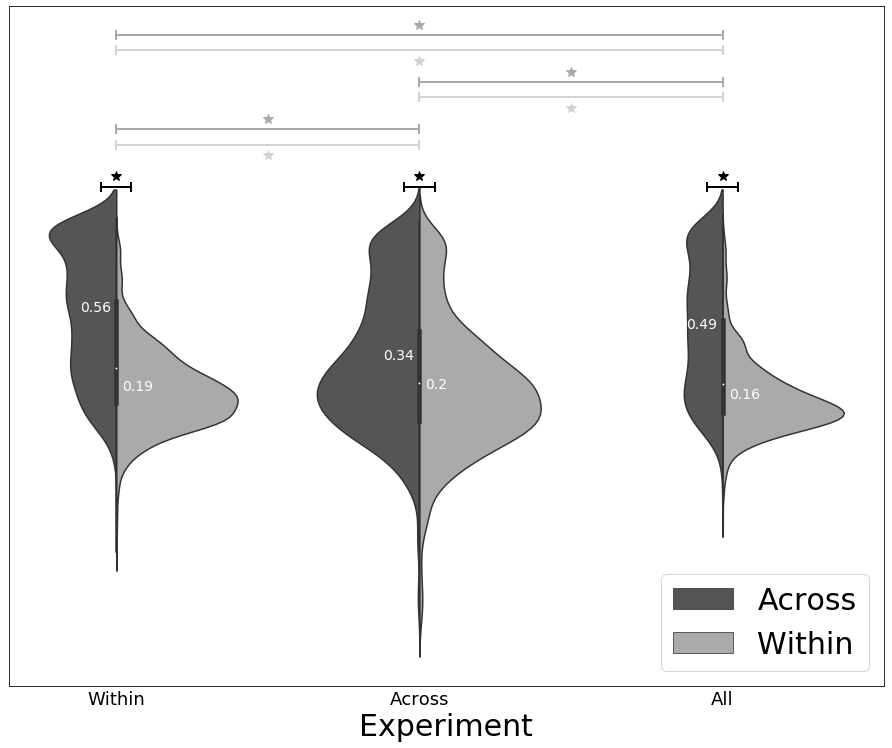

In [44]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formCatFR, yticks=False, outfile=outfile)

In [45]:
catfr_subject_e = np.array([])
catfr_W_w_w = np.array([])
catfr_W_a_w = np.array([])
catfr_W_a_all= np.array([])
catfr_W_a_a = np.array([])
catfr_W_w_all = np.array([])
catfr_W_w_a = np.array([])


catfr_R_e = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    #print(item.split('_')[0])
    catfr_subject_e = np.append(catfr_subject_e, item.split('_')[0] + '_' + item.split('_')[1]+ '_' + item.split('_')[2])
    catfr_W_w_w = np.append(catfr_W_w_w, CatFR_df['W_w_w'].iloc[i])
    catfr_W_a_w = np.append(catfr_W_a_w, CatFR_df['W_a_w'].iloc[i])
    catfr_W_a_all= np.append(catfr_W_a_all, CatFR_df['W_a_all'].iloc[i])
    catfr_W_a_a = np.append(catfr_W_a_a, CatFR_df['W_a_a'].iloc[i])
    catfr_W_w_all = np.append(catfr_W_w_all, CatFR_df['W_w_all'].iloc[i])
    catfr_W_w_a = np.append(catfr_W_w_a, CatFR_df['W_w_a'].iloc[i])
    catfr_R_e = np.append(catfr_R_e, CatFR_df['R'].iloc[i])

corr_catfr_e_df = pd.DataFrame()
corr_catfr_e_df['Subject'] = catfr_subject_e
corr_catfr_e_df['W_w_w'] = plot.r2z(catfr_W_w_w)
corr_catfr_e_df['W_a_w'] = plot.r2z(catfr_W_a_w )
corr_catfr_e_df['W_a_all'] = plot.r2z(catfr_W_a_all)
corr_catfr_e_df['W_a_a'] = plot.r2z(catfr_W_a_a)
corr_catfr_e_df['W_w_all'] = plot.r2z(catfr_W_w_all)
corr_catfr_e_df['W_w_a'] = plot.r2z(catfr_W_w_a )

corr_catfr_e_df['R'] = catfr_R_e

corr_catfr_e_df.dropna(inplace=True)

grouped_results_catfr = corr_catfr_e_df.groupby('Subject')['W_a_a','W_a_all', 'W_a_w', 'W_w_w', 'W_w_all', 'W_w_a'].mean()

grouped_results_catfr

## this didnt work... need to separate subject id catfrom electrode number
grouped_catfr_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_.name] = grouped_results_catfr[df_.name].values
        f_corrs[f_.name] = grouped_results_catfr[f_.name].values
        tstat = stats.ttest_rel(f_corrs[df_.name], f_corrs[f_.name])
        grouped_catfr_t_test = grouped_catfr_t_test.append({
            'Column_1' : df_.name,
            'Column_2' : f_.name, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)

In [46]:
grouped_catfr_t_test

,Column_1,Column_2,t,p
0,W_a_a,W_a_all,-3.202755,3.952565e-03
1,W_a_a,W_a_w,-5.727642,7.821513e-06
2,W_a_a,W_w_a,5.006197,4.593227e-05
3,W_a_a,W_w_all,4.702895,9.761128e-05
4,W_a_a,W_w_w,4.042188,5.065657e-04
5,W_a_all,W_a_w,-2.654616,1.416079e-02
6,W_a_all,W_w_a,7.698524,8.237659e-08
7,W_a_all,W_w_all,6.775654,6.544420e-07
8,W_a_all,W_w_w,6.121297,3.035996e-06
9,W_a_w,W_w_a,8.469268,1.591029e-08


## Across

In [47]:
A_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-a_exp.csv', index_col=0)
A_a_a.name = 'A_a_a'
A_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-all_exp.csv', index_col=0)
A_a_all.name = 'A_a_all'
A_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-w_exp.csv', index_col=0)
A_a_w.name = 'A_a_w'
A_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-a_exp.csv', index_col=0)
A_w_a.name = 'A_w_a'
A_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-all_exp.csv', index_col=0)
A_w_all.name = 'A_w_all'
A_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-w_exp.csv', index_col=0)
A_w_w.name = 'A_w_w'

In [48]:
dfs_2 = [A_a_a, A_a_all, A_a_w, A_w_w]

In [49]:
RAM_df_2 = dfs_2[0]
RAM_df_2 = RAM_df_2.rename(columns={"Correlation":RAM_df_2.name})
for df_ in dfs_2[1:]:
    RAM_df_2 = RAM_df_2.merge(df_, on=['Subject', 'R'])
    RAM_df_2 = RAM_df_2.rename(columns={"Correlation":df_.name})

In [50]:
RAM_df_2.dropna(inplace=True)

In [51]:
column_corrs = []
for d in dfs_2:
    column_corrs.append(d.name)

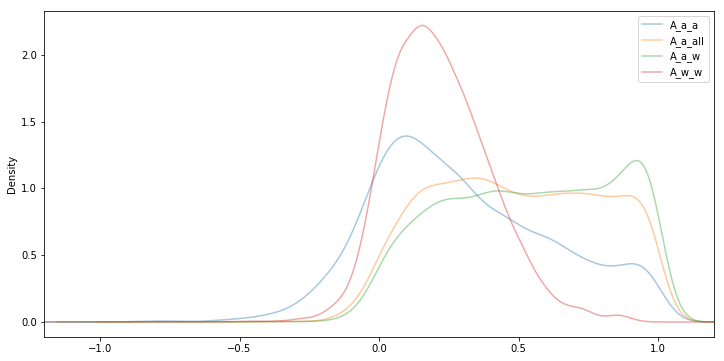

In [52]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

RAM_df_2[column_corrs].plot(kind='kde', figsize=[12,6], alpha=.4, legend=True, xlim=(-1.2, 1.2))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Density', fontsize=21)
ax.set_xlabel('Correlation', fontsize=21)
plt.savefig(outfile)

In [53]:
long_formRAM = long_form_df(RAM_df_2, dfs_2[0])
for df_ in dfs_2[1:]:
    long_formRAM = long_formRAM.append(long_form_df(RAM_df_2, df_))


In [54]:
long_form_within = pd.DataFrame()
long_form_within = long_form_df(RAM_df, dfs[3])
for df_ in dfs[4:5]:
    long_form_within  = long_form_within.append(long_form_df(RAM_df, df_))

In [55]:
long_formRAM = long_formRAM.append(long_form_within)